<a name="1common."></a>
## Содержание:
* [1. Описание проекта, описание данных, загрузка и импорт библиотек](#1.)
* [2. Приоритизация гипотез](#2.)
     - [2.1. ICE](#2.1.)
     - [2.2. RICE](#2.2.)
     - [2.3. Сравнительный анализ гипотез](#2.3.)
* [3. Анализ A/B-теста](#3.)
     - [3.1. Orders](#3.1.)
     - [3.2. Visitors](#3.2.)
     - [3.3. Кумулятивная выручки по группам](#3.3.)
     - [3.4. Кумулятивный средний чек по группам](#3.4.)
         - [3.4.1. Относительного изменения кумулятивного среднего чека группы B к группе A](#3.4.1.)
     - [3.5. Кумулятивная конверсия по группам](#3.5.)
         - [3.5.1. График относительного изменения кумулятивной конверсии группы B к группе A](#3.5.1.)
     - [3.6. Анализ количества заказов по пользователям](#3.6.)
     - [3.7. Анализ стоймостей заказов](#3.7.)
* [4. Статистическая значимость](#4.)
     - [4.1. Различия в конверсиях](#4.1.)
     - [4.2. Различия в средних чеках ](#4.2.)
* [5. Вывод](#5.)

 <a name="1."><a/><br/>
    <font size ="5"><b>1. Описание проекта, описание данных, загрузка и импорт библиотек</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

**Описание данных**

Файл /datasets/hypothesis.csv
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import scipy.stats as stats  # статистические тесты
import pandas as pd  # работа с таблицами
import seaborn as sns
from matplotlib import pyplot as plt  # графики
import numpy as np  # математика
import warnings
warnings.simplefilter('ignore')

 <a name="2."><a/><br/>
    <font size ="5"><b>2. Приоритизация гипотез</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [2]:
# посмотрим на всю таблицу
hyp = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
hyp

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


 <a name="2.1."><a/><br/>
    <font size ="4"><b>2.1 ICE</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [3]:
# посчитаем ICE и отсортируем таблицу по убыванию показателя
hyp['ICE'] = hyp['Impact']*hyp['Confidence'] / hyp['Efforts']
hyp[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


 <a name="2.2."><a/><br/>
    <font size ="4"><b>2.2. RICE</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [4]:
# посчитаем RICE и отсортируем таблицу по убыванию показателя
hyp['RICE'] = hyp['Reach']*hyp['Impact']*hyp['Confidence'] / hyp['Efforts']
hyp[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


<a name="2.3."><a/><br/>
    <font size ="4"><b>2.3. Сравнительный анализ гипотез</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

## Вывод

Приоритеты изменились, когда мы добавили количество пользователей, которых затронет данный эксперимент. 

В тройке лидеров совпали Гипотеза 0 и 7. 

Выпала Гипотеза 8 - слишком маленький охват аудитории, выручку будут повышать только те у кого сегодня день рождение. 

Выпала Гипотеза 2 - скорее всего это изменение не сильно повлияет на пользователей.

Наши лидеры
1. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
2. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
Но из гипотезы про подписку, выходит новая гипотеза, а "Наша email рассылка увеличит выручку".

<a name="3."><a/><br/>
    <font size ="5"><b>3. Анализ A/B-теста</b></font><br/>
<a name="3.1."><a/><br/>
    <font size ="4"><b>3.1. Orders</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [5]:
# ознакомление
orders = pd.read_csv('/datasets/orders.csv')
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# типы данных
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


<a name="3.2."><a/><br/>
    <font size ="4"><b>3.2. Visitors</b></font><br/>
[<font size="2">(к содержанию)</font>](#1common.)

In [7]:
# ознакомление
visits = pd.read_csv('/datasets/visitors.csv')
visits.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
# типы данных
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
# дубликаты
print(orders.duplicated().sum())
print(visits.duplicated().sum())

0
0


<a name="3.3."><a/><br/>
    <font size ="4"><b>3.3. Кумулятивная выручки по группам</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

In [10]:
# сгруппируем данные по дате и тесту
datesGroups = orders[['date', 'group']].drop_duplicates()

# найдем количество заказов и общую выручку по группам, на каждый день
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date': 'max', 'group': 'max',
                                           'transactionId': 'nunique', 'visitorId': 'nunique',
                                           'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])
ordersAggregated.head(5)

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [11]:
# найдем количество посетителей по группам, на каждый день
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(
    visits['date'] <= x['date'], visits['group'] == x['group'])].agg(
    {'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])
visitorsAggregated.head(5)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [12]:
# соединим две таблицы по группам в одну кумулятивную(с накопленным количество покупателей, заказов, выручки и посетителей)
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=[
                                         'date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group',
                           'orders', 'buyers', 'revenue', 'visitors']
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Text(0.5, 1.0, 'График по выручке')

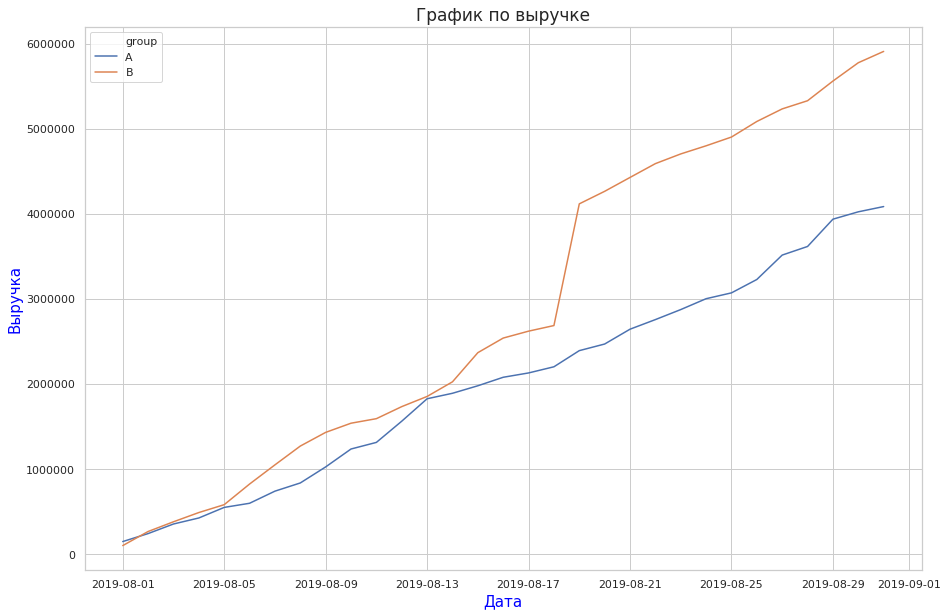

In [13]:
# Строим график выручки группы А и B
cummulativeData['date'] = pd.to_datetime(cummulativeData['date'])
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
sns.lineplot(cummulativeData['date'],
             cummulativeData['revenue'], hue=cummulativeData['group'])
plt.xlabel('Дата', fontsize=15, color='blue')
plt.ylabel('Выручка', fontsize=15, color='blue')
plt.title('График по выручке', fontsize=17)

По общей картине выручка в группе B больше. Видим всплеск выручки 18.08, взглянем на средний чек

<a name="3.4."><a/><br/>
    <font size ="4"><b>3.4. Кумулятивный средний чек по группам</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

Text(0.5, 1.0, 'График по среднему чеку')

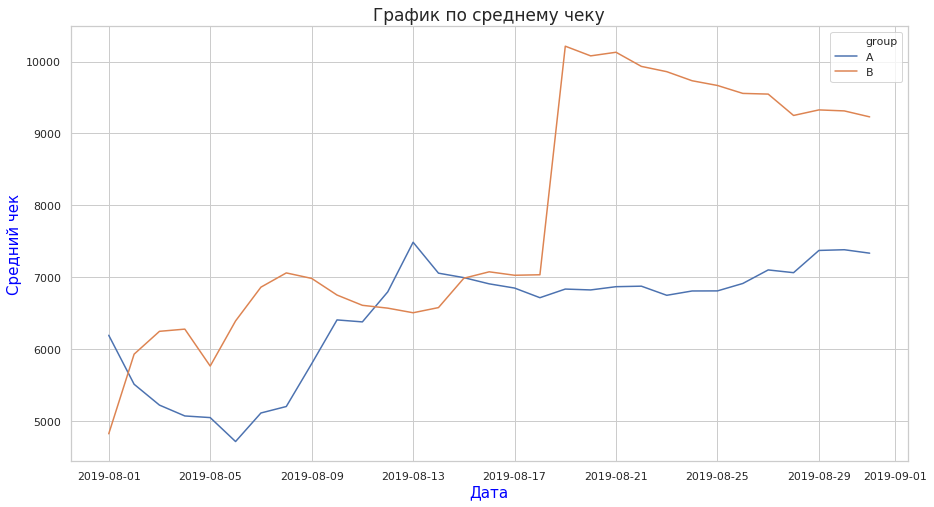

In [14]:
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.lineplot(cummulativeData['date'], cummulativeData['revenue'] /
             cummulativeData['orders'], hue=cummulativeData['group'])
plt.xlabel('Дата', fontsize=15, color='blue')
plt.ylabel('Средний чек', fontsize=15, color='blue')
plt.title('График по среднему чеку', fontsize=17)

Действительно, очень большой средний чек на это число

<a name="3.4.1."><a/><br/>
    <font size ="4"><b>3.4.1. Относительного изменения кумулятивного среднего чека группы B к группе A</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

In [15]:
# сделаем срез по группе A и B нашей общей таблицы
cummulativeRevenueA = cummulativeData[cummulativeData['group'] == 'A'][[
    'date', 'revenue', 'orders']]
cummulativeRevenueB = cummulativeData[cummulativeData['group'] == 'B'][[
    'date', 'revenue', 'orders']]

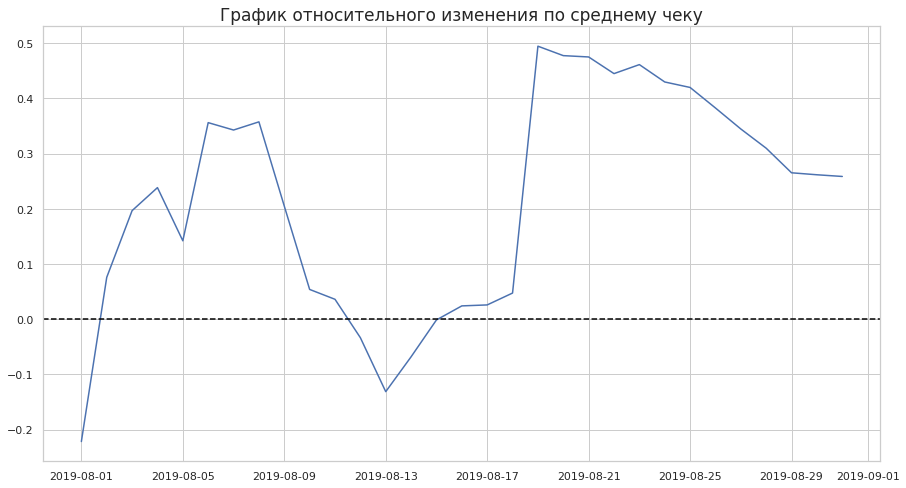

In [16]:
# собираем данные по группам в разных столбцах для удобства сравнения
mergedCummulativeRevenue = cummulativeRevenueA.merge(
    cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 8))
# cтроим отношение средних чеков
plt.plot(mergedCummulativeRevenue['date'], (
    mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(
    mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения по среднему чеку', fontsize=17)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

График относительного изменения среднего чека очень скачет. Есть выбросы, но в среднем в группе B он больше, но выводы делать рано

<a name="3.5."><a/><br/>
    <font size ="4"><b>3.5. Кумулятивная конверсия по группам</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

['2019-08-01', '2019-09-01', 0.025, 0.04]

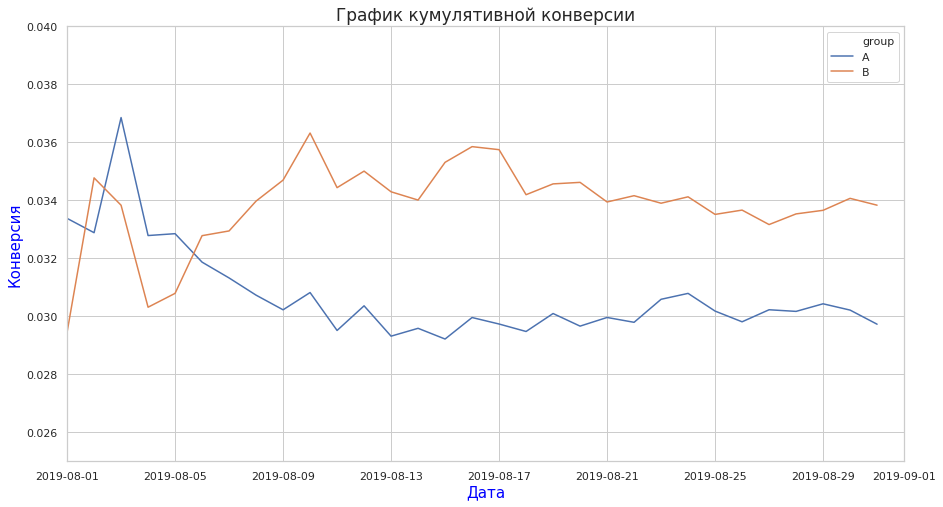

In [17]:
# считаем накопленную конверсию
cummulativeData['conversion'] = cummulativeData['orders'] / \
    cummulativeData['visitors']

# строим график по накопленной конверсии двух групп
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
sns.lineplot(cummulativeData['date'],
             cummulativeData['conversion'], hue=cummulativeData['group'])
plt.xlabel('Дата', fontsize=15, color='blue')
plt.ylabel('Конверсия', fontsize=15, color='blue')
plt.title('График кумулятивной конверсии', fontsize=17)
plt.axis(["2019-08-01", '2019-09-01', 0.025, 0.040])

Конверсии колебались первые 5 дней, потом начали стабилизироваться. Группа B вверх, группа A вниз

<a name="3.5.1."><a/><br/>
    <font size ="4"><b>3.5.1. График относительного изменения кумулятивной конверсии группы B к группе A</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

Text(0.5, 1.0, 'График прироста конверсии')

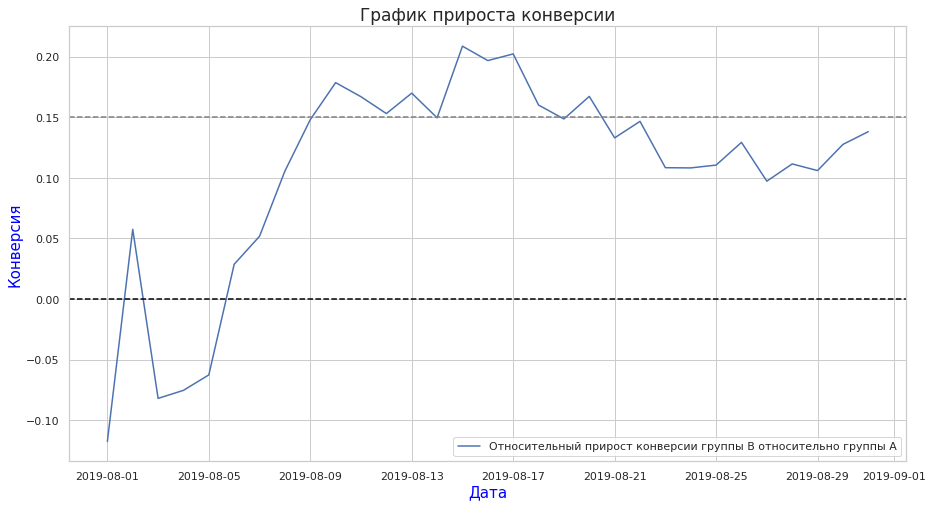

In [18]:
# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group'] == 'A']

# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group'] == 'B']

# собираем в одну для относительного сравнения
mergedCummulativeConversions = cummulativeDataA[['date', 'conversion']].merge(
    cummulativeDataB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15, 8))
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']
         / mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xlabel('Дата', fontsize=15, color='blue')
plt.ylabel('Конверсия', fontsize=15, color='blue')
plt.title('График прироста конверсии', fontsize=17)

Конверсия группы B показала стремительный рост, затем падение, затем хороший рост и постепенное закрепление на уровне 0.15

<a name="3.6."><a/><br/>
    <font size ="4"><b>3.6. Анализ количества заказов по пользователям</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

In [19]:
# сгруппируем по пользователям и количеству заказов
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({
    'transactionId':  'nunique'})
ordersByUsers.columns = ['visitorId', 'orders']

(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

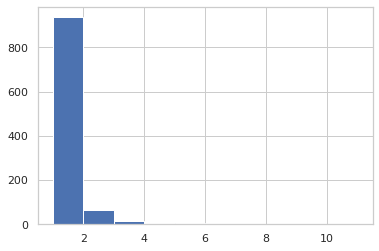

In [20]:
plt.hist(ordersByUsers['orders'])

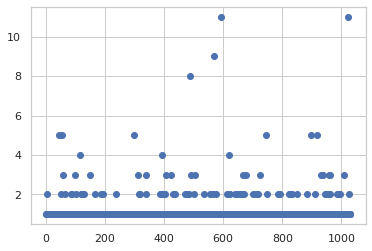

In [21]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])

Видим наличие выбросов. Больше 3 - заказов редкое явление.  Взглянем на процентили

In [1]:
np.percentile(ordersByUsers['orders'], [95, 99])

NameError: name 'np' is not defined

Больше 2 заказов только у 5% пользователей. Можно отбросить всех, у кого заказов больше трех

<a name="3.7."><a/><br/>
    <font size ="4"><b>3.7. Анализ стоимостей заказов</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+01, 1.294950e+05, 2.589400e+05, 3.883850e+05,
        5.178300e+05, 6.472750e+05, 7.767200e+05, 9.061650e+05,
        1.035610e+06, 1.165055e+06, 1.294500e+06]),
 <a list of 10 Patch objects>)

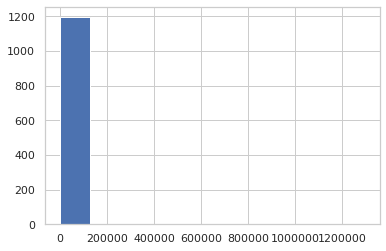

In [23]:
plt.hist(orders['revenue'])

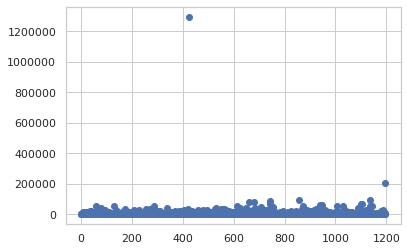

In [24]:
x_values1 = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values1, orders['revenue'])

Видно, что все заказы не превышают сумму 200000, но есть два очень явных выброса, приблизим график

(0, 200000)

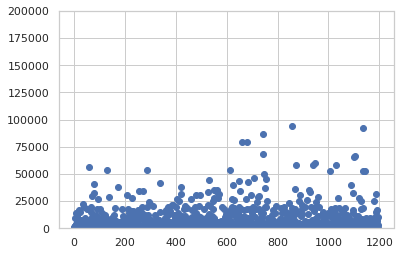

In [25]:
plt.scatter(x_values1, orders['revenue'])
plt.ylim(0, 200000)

Много выбросов выше 50000

In [26]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

А вот здесь мы видим, что выбросы есть. Больше чем на 28 000 купило всего 5%. Возьмем границу в 50 000.

<a name="4."><a/><br/>
    <font size ="5"><b>4. Статистическая значимость</b></font><br/>
<a name="4.1."><a/><br/>
    <font size ="4"><b>4.1. Различия в конверсиях по "сырым" данным</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

In [27]:
# найдем пользователей по дате группы А
visitorsADaily = visits[visits['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# найдем пользователей по дате группы B
visitorsBDaily = visits[visits['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [28]:
# найдем заказы по каждому пользователю группы A
ordersByUsersA = orders[orders['group'] == 'A'].groupby(
    'visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersA.columns = ['userId', 'orders']

# и группы B
ordersByUsersB = orders[orders['group'] == 'B'].groupby(
    'visitorId', as_index=False).agg({'transactionId': 'nunique'})
ordersByUsersB.columns = ['userId', 'orders']

# соберем всех пользователей группы A, и тем кто не делал заказ присвоим цифру 0
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum()
                                                                            - len(ordersByUsersA['orders'])), name='orders')], axis=0)
# с группой B сделаем тоже самое
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum()
                                                                            - len(ordersByUsersB['orders'])), name='orders')], axis=0)
# проведем непараметрический тест сравнения двух средних Мана - Уитни
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)[1]
print("p-value = {0:.3f}".format(results))

if (results < alpha):
    print("Различия есть")
else:
    print("Не можем утверждать ,что различия есть")

print("Относительный выигрыш группы B = {0:.1%}".format(
    sampleB.mean()/sampleA.mean()-1))

p-value = 0.008
Различия есть
Относительный выигрыш группы B = 13.8%


Статистически значимые различия в конверсиях есть. Конверсия группы B больше на 13.8%. Посмотрим на очищенных данных

## «Очищенные» данные

In [29]:
# отфильтруем заказы по количеству и сумме выручки(уберем больше 3 и больше 50000)
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]
                                 ['userId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['userId']], axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 50000]['visitorId']
abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)  # посмотрим количество аномалий

1099    148427295
18      199603092
23      237748145
1137    759473111
949     887908475
dtype: int64
(23,)


23 пользователь с аномальными заказами

In [30]:
# объединим таблицы без аномалий тем же способом. Для группы A
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], pd.Series(
    0, index=np.arange(visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)

# Для группы B
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], pd.Series(
    0, index=np.arange(visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

In [31]:
# проведем непараметрический тест сравнения двух средних Мана - Уитни на очещенных данных
alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("p-value = {0:.3f}".format(results))

if (results < alpha):
    print("Различия есть")
else:
    print("Не можем утверждать ,что различия есть")

print("Относительный выигрыш группы B = {0:.1%}".format(
    sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.006
Различия есть
Относительный выигрыш группы B = 17.5%


Признаем различия статистически значимыми. На очищенных данных, показатель относительной конверсии еще выше. Относительный выигрыш группы B = 18.0%

<a name="4.2."><a/><br/>
    <font size ="4"><b>4.2. Различия в средних чеках</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

In [32]:
# проведем тест Мана -Уитни. Проверим гипотезу о различиях среднего чека этих групп
alpha = 0.05
results1 = stats.mannwhitneyu(
    orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]

if (results1 < alpha):
    print("Различия есть")
else:
    print("Не можем утверждать ,что различия есть")
print("p-value = {0:.3f}".format(results1))
print("Относительный выигрыш группы B = {0:.1%}".format(
    orders[orders['group'] == 'B']['revenue'].mean()/orders[orders['group'] == 'A']['revenue'].mean()-1))

Не можем утверждать ,что различия есть
p-value = 0.365
Относительный выигрыш группы B = 25.9%


Не можем утверждать, что различия в среднем чеке есть. Хотя средний чек группы B на 25.9% выше

## «Очищенные» данные

In [33]:
# проведем тест Мана -Уитни. Проверим гипотезу о различиях среднего чека в группах без аномалий
alpha = 0.05
results3 = stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]

if (results3 < alpha):
    print("Различия есть")
else:
    print("Не можем утверждать ,что различия есть")
print("p-value = {0:.3f}".format(results1))
print("Относительный выигрыш группы B = {0:.1%}".format(orders[np.logical_and(
    orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() /
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

Не можем утверждать ,что различия есть
p-value = 0.365
Относительный выигрыш группы B = 2.4%


Мы не нашли статистически значимые различия в среднем чеке и после отчистки данных. Да и выигрыш группы B = 2.4% здесь не такой существенный

<a name="5."><a/><br/>
    <font size ="5"><b>5. Вывод</b></font><br/>
    [<font size="2">(к содержанию)</font>](#1common.)

1. Остановить тест, зафиксировать победу одной из групп. Победа группы "B"
2. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий
3. По сырым данным нет статистически значимого различия по среднему чеку между группами. После удаления аномалий статистически значимое различий тоже не обнаруженно
4. График различия конверсии между группами сообщает, что результаты группы B лучше группы A на 15 - 20%: имеют тенденцию к росту, либо зафиксировались около среднего значения.
5. График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Но и с аномалиями, и без статистически значимых различий нету